In [2]:
from src import *

In [3]:
def gradients_network_distance(G1,G2,similarity=True):
    networks = list(index2region.keys())
    V1 = np.asarray([network_volume(G1, R) for idx, R in enumerate(networks)])
    V2 = np.asarray([network_volume(G2, R) for idx, R in enumerate(networks)])
    
#     dist = np.sum((V1 - V2)**2)
    if similarity:
        dist = pearson_correlation(V1,V2)
    else:
        dist = np.sum((V1 - V2)**2)
    return dist

In [10]:
np.random.seed(99)
null_repetition = 1000
files = os.listdir('./resources/static_grad/individual_level/')
# we only consider parcel 400 for now
files = [f for f in files if '400' in f]
pred_grid = np.zeros((len(files), len(files)))
null_grid = np.zeros((null_repetition,len(files), len(files)))
for k in tqdm(range(len(files))):

        
    target   = load('./resources/static_grad/individual_level/{}'.format(files[k]))
    for j in range(len(files)):
        database = load('./resources/static_grad/individual_level/{}'.format(files[j]))

        subjects = list(database.keys())
        database_grad = [database[sub] for sub in subjects]

        matches = []
        null_matches = np.zeros((null_repetition, len(subjects)))
        for sidx, sub in enumerate(subjects):
            target_grad   = target[sub]

            # align all database gradients to target gradient
            aligned_grad,_,score = procrustes_align(database_grad, ref=target_grad)
#             if np.sum(np.asarray(score) > 100) > 0: print('Warning: might not be well-aligned') #the choice of 100 is arbitrary and empirically motivated
            
#             distances = [gradients_distance(aligned_grad[i], target_grad, pmethod="L2") 
#                          for i in range(len(aligned_grad))]
            distances = [gradients_network_distance(aligned_grad[i], target_grad, similarity=False)
                         for i in range(len(aligned_grad))]
            indexmatch = np.argsort(distances)[:1]
            bestmatch = [subjects[b] for b in indexmatch]

            for nbr in range(null_repetition):
                null_subjects = deepcopy(subjects)
                np.random.shuffle(null_subjects)
                nullmatch = [null_subjects[b] for b in indexmatch]
                null_matches[nbr, sidx] = sub in nullmatch

            matches.append(sub in bestmatch)

        null_grid[:,k,j] = np.mean(null_matches,axis=1)

        pred_grid[k,j]   = np.mean(matches)

  0%|          | 0/16 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'identifiability accuracy'}>

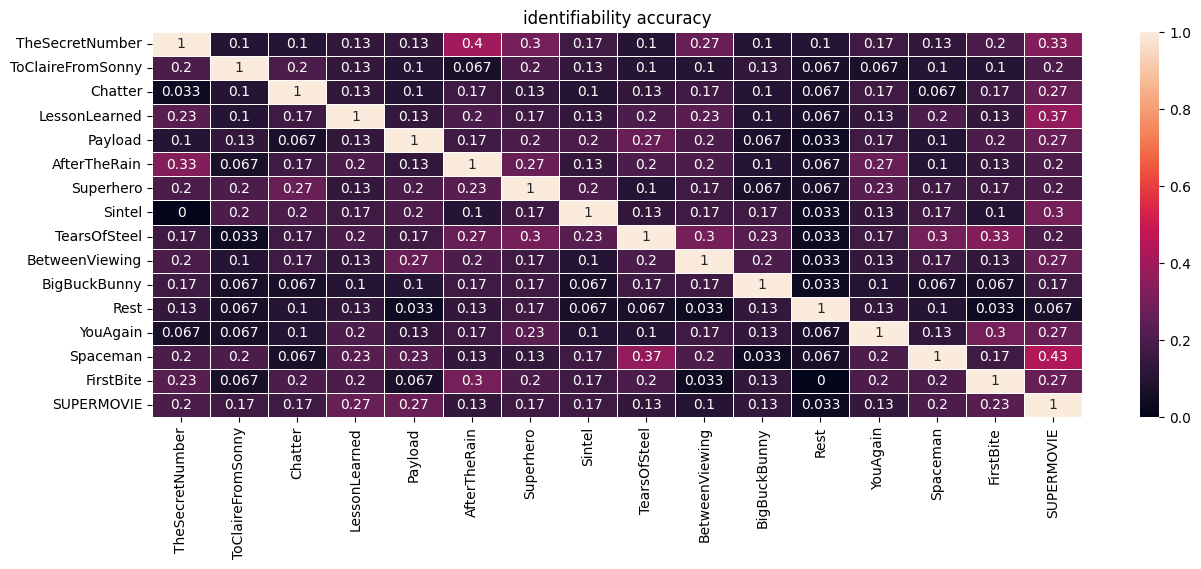

In [11]:
plt.figure(figsize=(15,5))
plt.title("identifiability accuracy")
x_axis_labels = [f.split('_')[0] for f in files] # labels for x-axis
sns.heatmap(pred_grid, linewidth=0.5,  annot=True, xticklabels=x_axis_labels, yticklabels=x_axis_labels)

<AxesSubplot:title={'center':'identifiability accuracy'}>

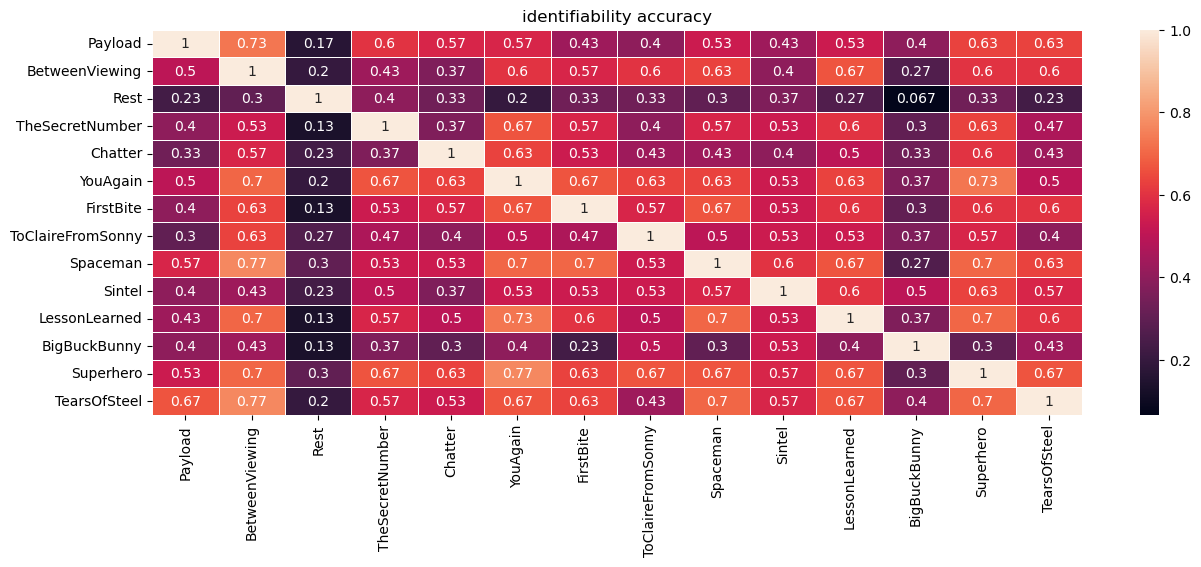

In [6]:
plt.figure(figsize=(15,5))
plt.title("identifiability accuracy")
x_axis_labels = [f.split('_')[0] for f in files] # labels for x-axis
sns.heatmap(pred_grid, linewidth=0.5,  annot=True, xticklabels=x_axis_labels, yticklabels=x_axis_labels)